## Comparison of Identified Substructures with Apogee

In [1]:
from Analysis import apogee_metallicities
import pandas as pd
lower_pm_results = 'data/matched_clusters_LowerPM.json'
higher_pm_results = 'data/matched_clusters_HigherPM.json'

## Function Overview: `apogee_metallicities`

This function performs a cross-match between Gaia stellar cluster data and APOGEE DR17 metallicity data, enhancing the cluster information with detailed metallicity measurements and incorporating external data from the Harris 2010 globular cluster catalog.

**Key Operations:**

1.  **Data Loading:**
    * Loads cluster data from a JSON file, which includes Gaia EDR3 source IDs for stars within each cluster.
    * Loads APOGEE DR17 allStarLite FITS file containing stellar metallicity information.
    * Loads metallicity data for Milky Way globular clusters from the Harris 2010 catalog.

2.  **Cross-Matching:**
    * Matches Gaia source IDs from the cluster data with corresponding entries in the APOGEE DR17 data.

3.  **Metallicity Calculation:**
    * Calculates statistical properties of metallicity for each cluster, including:
        * Mean and standard deviation of iron abundance ([Fe/H])
        * Mean and standard deviation of total metallicity ([M/H])
        * Mean and standard deviation of alpha-element enhancement ([α/M])

4.  **Integration of Harris 2010 Data:**
    * Merges metallicity values from the Harris 2010 catalog with the calculated cluster statistics, where available.

5.  **Filtering and Output:**
    * Filters the resulting data to include only clusters with a specified minimum number of matched stars and available Harris 2010 metallicity values.
    * Outputs two Pandas DataFrames:
        * A full summary of all clusters with APOGEE metallicities.
        * A filtered table meeting the specified criteria.

In [2]:
?apogee_metallicities

Signature:
apogee_metallicities(
    gaia_cluster_json,
    apogee_fits_path='data/ApogeeDR17_allStarLite.fits',
    harris_data_path='data/harris2010_mwgc.dat',
    matched_star_threshold=20,
)
Docstring:
Processes Gaia cluster data by cross-matching with APOGEE DR17 metallicity data 
and integrating Harris 2010 globular cluster metallicity values.

This function loads Gaia-based stellar clusters, extracts associated Gaia DR3 
source IDs, and attempts to match them with stars from the APOGEE DR17 catalog 
based on their source IDs. It then calculates statistical metallicity properties 
for each matched cluster and integrates [Fe/H] values from the Harris 2010 
globular cluster catalog where available.

Parameters:
-----------
gaia_cluster_json : str
    Path to a JSON file containing matched clusters and their corresponding 
    Gaia EDR3 source IDs.
apogee_fits_path : str, optional
    Path to the APOGEE DR17 allStarLite FITS file (default: 'data/ApogeeDR17_allStarLite.fits').
harris

# Low PM Dataset

In [5]:
lower_results = apogee_metallicities(lower_pm_results, apogee_fits_path = 'data/ApogeeDR17_allStarLite.fits', harris_data_path = 'data/harris2010_mwgc.dat', matched_star_threshold=10)
lower_results.to_json("data/lowerpm_apogee_results.json", orient="records", indent=2)

2025-04-04 11:21:58,035 - INFO - Total Gaia IDs that will be attempted to match with APOGEE: 951260
2025-04-04 11:22:01,209 - INFO - Successfully loaded 733901 stars from APOGEE DR17.
2025-04-04 11:22:01,500 - INFO - Matched 15018 Gaia stars with APOGEE metallicities: While trying to find 951260 Gaia IDS in 733901 APOGEE items.
2025-04-04 11:22:01,500 - INFO - Calculating statistics for each cluster with available apogee data.
2025-04-04 11:22:02,322 - INFO - Successfully merged Harris 2010 metallicities with cluster statistics for those stars available.



Full Cluster Statistics Table:


,Cluster Name,Matched Stars,Mean Fe_H,Std Dev Fe_H,Mean M_H,Std Dev M_H,Mean Alpha_M,Std Dev Alpha_M,Harris_Fe_H
0,NGC 6723,3,-0.996967,0.065984,-0.996900,0.072774,0.248112,0.037675,-1.10
1,"Terzan 7, Arp 2, Terzan 8",35,-0.708377,0.284330,-0.733980,0.291936,-0.006310,0.057999,NaN
2,Sagittarius,333,-0.651908,0.325162,-0.671014,0.342800,-0.013333,0.074107,NaN
3,NGC 6864,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.29
4,NGC 6426,0,NaN,NaN,NaN,NaN,NaN,NaN,-2.15
5,NGC 6981,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.42
6,NGC 5272,90,-1.415466,0.082010,-1.432552,0.092057,0.165441,0.067294,-1.50
7,NGC 7492,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.78
8,NGC 7089,5,-1.446840,0.046079,-1.459340,0.066376,0.167600,0.065497,-1.65
9,NGC 6205,30,-1.466709,0.120871,-1.441548,0.130366,0.161400,0.092266,-1.53



Filtered Clusters (Matched Stars > 10 and valid Harris_Fe_H):


,Cluster Name,Matched Stars,Mean Fe_H,Std Dev Fe_H,Mean M_H,Std Dev M_H,Mean Alpha_M,Std Dev Alpha_M,Harris_Fe_H
6,NGC 5272,90,-1.415466,0.082010,-1.432552,0.092057,0.165441,0.067294,-1.50
9,NGC 6205,30,-1.466709,0.120871,-1.441548,0.130366,0.161400,0.092266,-1.53
10,NGC 7078,84,-2.289832,0.095281,-2.213170,0.142825,0.198444,0.163315,-2.37
15,NGC 1904,36,-1.517931,0.133169,-1.514494,0.158816,0.122124,0.073902,-1.60
17,NGC 1851,38,-1.142199,0.195719,-1.160312,0.223550,0.193615,0.149167,-1.18
23,NGC 2808,76,-1.072369,0.074776,-1.071958,0.089633,0.134176,0.076219,-1.14
26,NGC 4590,28,-2.243825,0.084001,-2.181136,0.119711,0.244560,0.107611,-2.23
33,NGC 5024,22,-1.895618,0.083803,-1.886745,0.098775,0.227940,0.069794,-2.10
34,NGC 5053,13,-2.195192,0.120751,-2.163192,0.139464,0.230083,0.099679,-2.27


## Higher PM Dataset

In [6]:
higher_results = apogee_metallicities(higher_pm_results, apogee_fits_path = 'data/ApogeeDR17_allStarLite.fits', harris_data_path = 'data/harris2010_mwgc.dat', matched_star_threshold=9)
higher_results.to_json("data/higherpm_apogee_results.json", orient="records", indent=2)

2025-04-04 11:22:03,790 - INFO - Total Gaia IDs that will be attempted to match with APOGEE: 231502
2025-04-04 11:22:04,845 - INFO - Successfully loaded 733901 stars from APOGEE DR17.
2025-04-04 11:22:04,974 - INFO - Matched 1215 Gaia stars with APOGEE metallicities: While trying to find 231502 Gaia IDS in 733901 APOGEE items.
2025-04-04 11:22:04,974 - INFO - Calculating statistics for each cluster with available apogee data.
2025-04-04 11:22:05,079 - INFO - Successfully merged Harris 2010 metallicities with cluster statistics for those stars available.



Full Cluster Statistics Table:


,Cluster Name,Matched Stars,Mean Fe_H,Std Dev Fe_H,Mean M_H,Std Dev M_H,Mean Alpha_M,Std Dev Alpha_M,Harris_Fe_H
0,NGC 5904,23,-1.198380,0.096100,-1.215857,0.108293,0.197006,0.076065,-1.29
1,NGC 7099,0,NaN,NaN,NaN,NaN,NaN,NaN,-2.27
2,NGC 6981,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.42
3,NGC 5272,25,-1.415905,0.079073,-1.426977,0.090835,0.162770,0.063794,-1.50
4,NGC 5466,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.98
5,NGC 7089,0,NaN,NaN,NaN,NaN,NaN,NaN,-1.65
6,NGC 6205,10,-1.517410,0.084477,-1.509200,0.143005,0.171105,0.090042,-1.53
7,NGC 7078,17,-2.259271,0.099400,-2.154324,0.104972,0.153626,0.123457,-2.37
8,NGC 6341,4,-2.189650,0.043032,-2.144100,0.067707,0.207694,0.110636,-2.31
9,NGC 1904,2,-1.489550,0.123673,-1.496150,0.148705,0.167799,0.082259,-1.60



Filtered Clusters (Matched Stars > 9 and valid Harris_Fe_H):


,Cluster Name,Matched Stars,Mean Fe_H,Std Dev Fe_H,Mean M_H,Std Dev M_H,Mean Alpha_M,Std Dev Alpha_M,Harris_Fe_H
0,NGC 5904,23,-1.198380,0.096100,-1.215857,0.108293,0.197006,0.076065,-1.29
3,NGC 5272,25,-1.415905,0.079073,-1.426977,0.090835,0.162770,0.063794,-1.50
6,NGC 6205,10,-1.517410,0.084477,-1.509200,0.143005,0.171105,0.090042,-1.53
7,NGC 7078,17,-2.259271,0.099400,-2.154324,0.104972,0.153626,0.123457,-2.37


# Further analysis of Lower PM Results
- This selects results shown in the table and plots them

Pearson correlation: -0.731 (p = 0.0251)


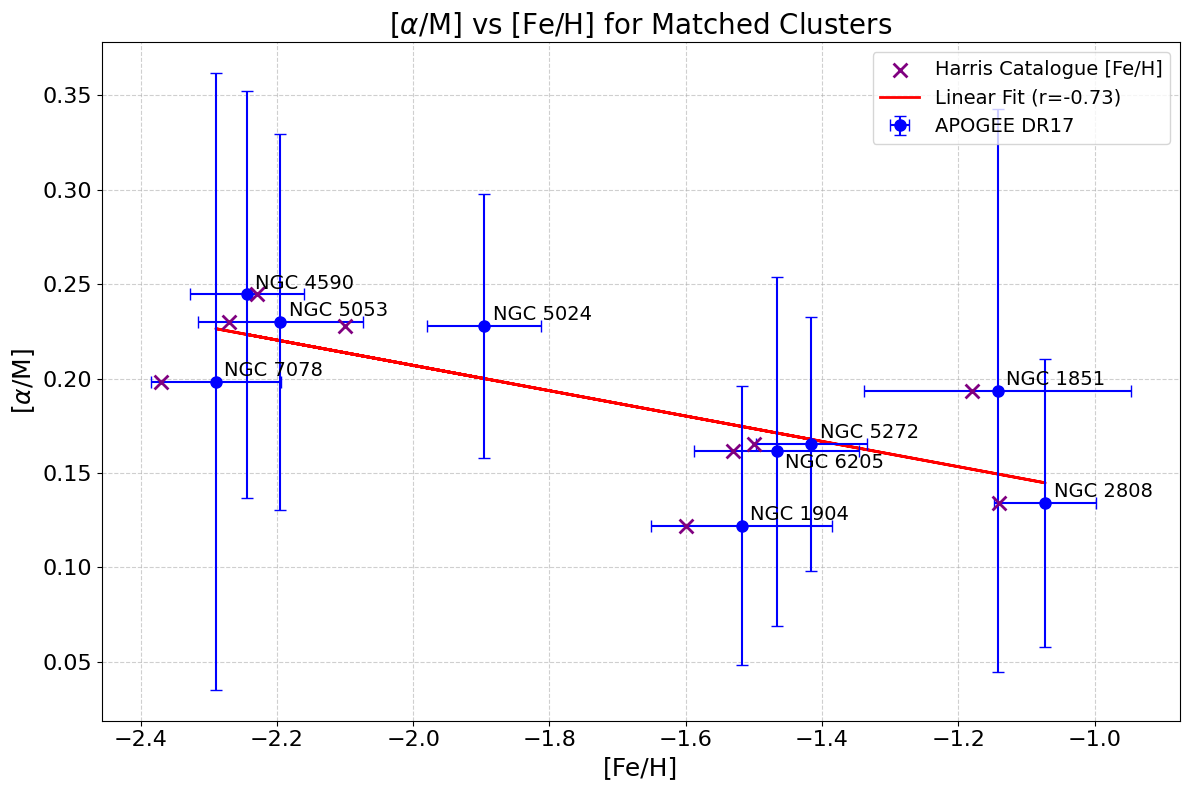

In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load JSON data
with open("data/lowerpm_apogee_results.json", "r") as f:
    data = json.load(f)

# Filter valid entries
filtered = [
    entry for entry in data
    if entry["Matched Stars"] > 10 and entry["Harris_Fe_H"] is not None
]

# Extract arrays
alpha_m = np.array([entry["Mean Alpha_M"] for entry in filtered])
alpha_m_err = np.array([entry["Std Dev Alpha_M"] for entry in filtered])
fe_h = np.array([entry["Mean Fe_H"] for entry in filtered])
fe_h_err = np.array([entry["Std Dev Fe_H"] for entry in filtered])
fe_h_harris = np.array([entry["Harris_Fe_H"] for entry in filtered])
labels = [entry["Cluster Name"] for entry in filtered]

# Best-fit line (linear regression)
slope, intercept = np.polyfit(fe_h, alpha_m, 1)
fit_line = slope * fe_h + intercept

# Pearson correlation
correlation, p_value = pearsonr(fe_h, alpha_m)
print(f"Pearson correlation: {correlation:.3f} (p = {p_value:.3g})")

# Plot
plt.figure(figsize=(12, 8))

# APOGEE points with error bars
plt.errorbar(
    fe_h, alpha_m, xerr=fe_h_err, yerr=alpha_m_err,
    fmt='o', capsize=4, label='APOGEE DR17',
    markersize=8, color='blue', ecolor='blue', linewidth=1.5, zorder=3
)

# Harris catalogue points
plt.scatter(
    fe_h_harris, alpha_m, marker='x', color='purple',
    label='Harris Catalogue [Fe/H]', s=100, linewidths=2, zorder=4
)

# Best-fit line
plt.plot(
    fe_h, fit_line, color='red', linestyle='-', linewidth=2,
    label=f'Linear Fit (r={correlation:.2f})', zorder=2
)

# Annotate points
for x, y, name in zip(fe_h, alpha_m, labels):
    if name == 'NGC 6205':
        plt.annotate(name, (x, y), xytext=(6, -12), textcoords='offset points',
                    fontsize=14, zorder=5)

    else: 
        plt.annotate(name, (x, y), xytext=(6, 4), textcoords='offset points',
                    fontsize=14, zorder=5)

# Labels and styling
plt.xlabel('[Fe/H]', fontsize=18)
plt.ylabel(r'[$\alpha$/M]', fontsize=18)
plt.title(r'[$\alpha$/M] vs [Fe/H] for Matched Clusters', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14  , loc='upper right')
plt.tight_layout()

plt.show()